# **Практический кейс**
**"Прогнозирование размеров сварного шва при электронно-лучевой сварке
тонкостенных конструкций аэрокосмического назначения"**

## **1 Анализ данных**

В качестве исходных данных были взяты результаты экспериментальных
исследований, проводимых в целях улучшения технологического процесса
электронно-лучевой сварки изделия, сборка которого состоит из элементов,
состоящих из разнородного материала.
Установка электронно-лучевой сварки, на которой проводились
исследования, предназначена для сварки электронным лучом в глубоком вакууме
деталей сборочных единиц из нержавеющих сталей, титановых, алюминиевых
и специальных сплавов.
Существующая установка электронно-лучевой сварки обеспечивает
повторяемость режимов в рамках возможностей реализованной системы
управления. Работы по сварке выполнялись на образцах-имитаторах,
соответствующих технологическому изделию.
Для уменьшения вложения энергии при сварке:
1. Снижалась величина сварочного тока (IW);
2. Увеличивался ток фокусировки электронного пучка (IF);
3. Увеличивалась скорость сварки (VW);
4. Менялось расстояние от поверхности образцов до электронно-оптической
системы (FP).
По совокупности параметров технологических режимов обеспечивались
минимально возможные размеры сварных швов: глубина шва (Depth) и ширина
шва (Width).
В процессе выполнения работ была произведена электронно-лучевая сварка
18-ти единиц образцов. Результаты металлографического контроля
по размерам сварного шва для каждого образца проводились в 4-х поперечных
сечениях сварного шва. Ускоряющее напряжение было постоянным в диапазоне
19,8 – 20 кВ. Набор полученных данных собраны в составе режимов сварки,
размеров сварочных швов в поперечных сечениях всех образцов.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
import pickle
from sklearn.preprocessing import StandardScaler # Стандартизация
from sklearn.preprocessing import MinMaxScaler # Нормализация
#from sklearn.preprocessing import LabelEncoder # Кодирование
from sklearn.model_selection import GridSearchCV # Подбор гиперпараметров
from sklearn.model_selection import train_test_split # Разделение датасета на части
from sklearn.model_selection import StratifiedKFold # Разделение датасета с сохранением распределения
# Модели обучения
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
# Метрики
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [2]:
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Exam_2/ebw_data.csv")

In [ ]:
df.head(100)

,IW,IF,VW,FP,Depth,Width
0,47,139,4.5,80,1.60,2.54
1,47,139,4.5,80,1.62,2.50
2,47,139,4.5,80,1.68,2.60
3,47,139,4.5,80,1.58,2.52
4,45,140,4.5,80,1.76,2.48
...,...,...,...,...,...,...
67,44,146,9.0,60,1.20,1.72
68,45,146,9.0,60,1.36,1.76
69,45,146,9.0,60,1.28,1.76
70,45,146,9.0,60,1.28,1.76


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IW      72 non-null     int64  
 1   IF      72 non-null     int64  
 2   VW      72 non-null     float64
 3   FP      72 non-null     int64  
 4   Depth   72 non-null     float64
 5   Width   72 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 3.5 KB


In [ ]:
df.describe(include='all')

,IW,IF,VW,FP,Depth,Width
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,45.666667,141.333333,8.638889,78.333333,1.195556,1.970417
std,1.678363,5.145763,2.061078,21.493530,0.225081,0.279040
min,43.000000,131.000000,4.500000,50.000000,0.800000,1.680000
25%,44.000000,139.000000,8.000000,60.000000,1.080000,1.760000
50%,45.500000,141.000000,9.000000,80.000000,1.200000,1.840000
75%,47.000000,146.000000,10.000000,80.000000,1.290000,2.050000
max,49.000000,150.000000,12.000000,125.000000,1.760000,2.600000


array([[<Axes: title={'center': 'IW'}>, <Axes: title={'center': 'IF'}>],
       [<Axes: title={'center': 'VW'}>, <Axes: title={'center': 'FP'}>],
       [<Axes: title={'center': 'Depth'}>,
        <Axes: title={'center': 'Width'}>]], dtype=object)

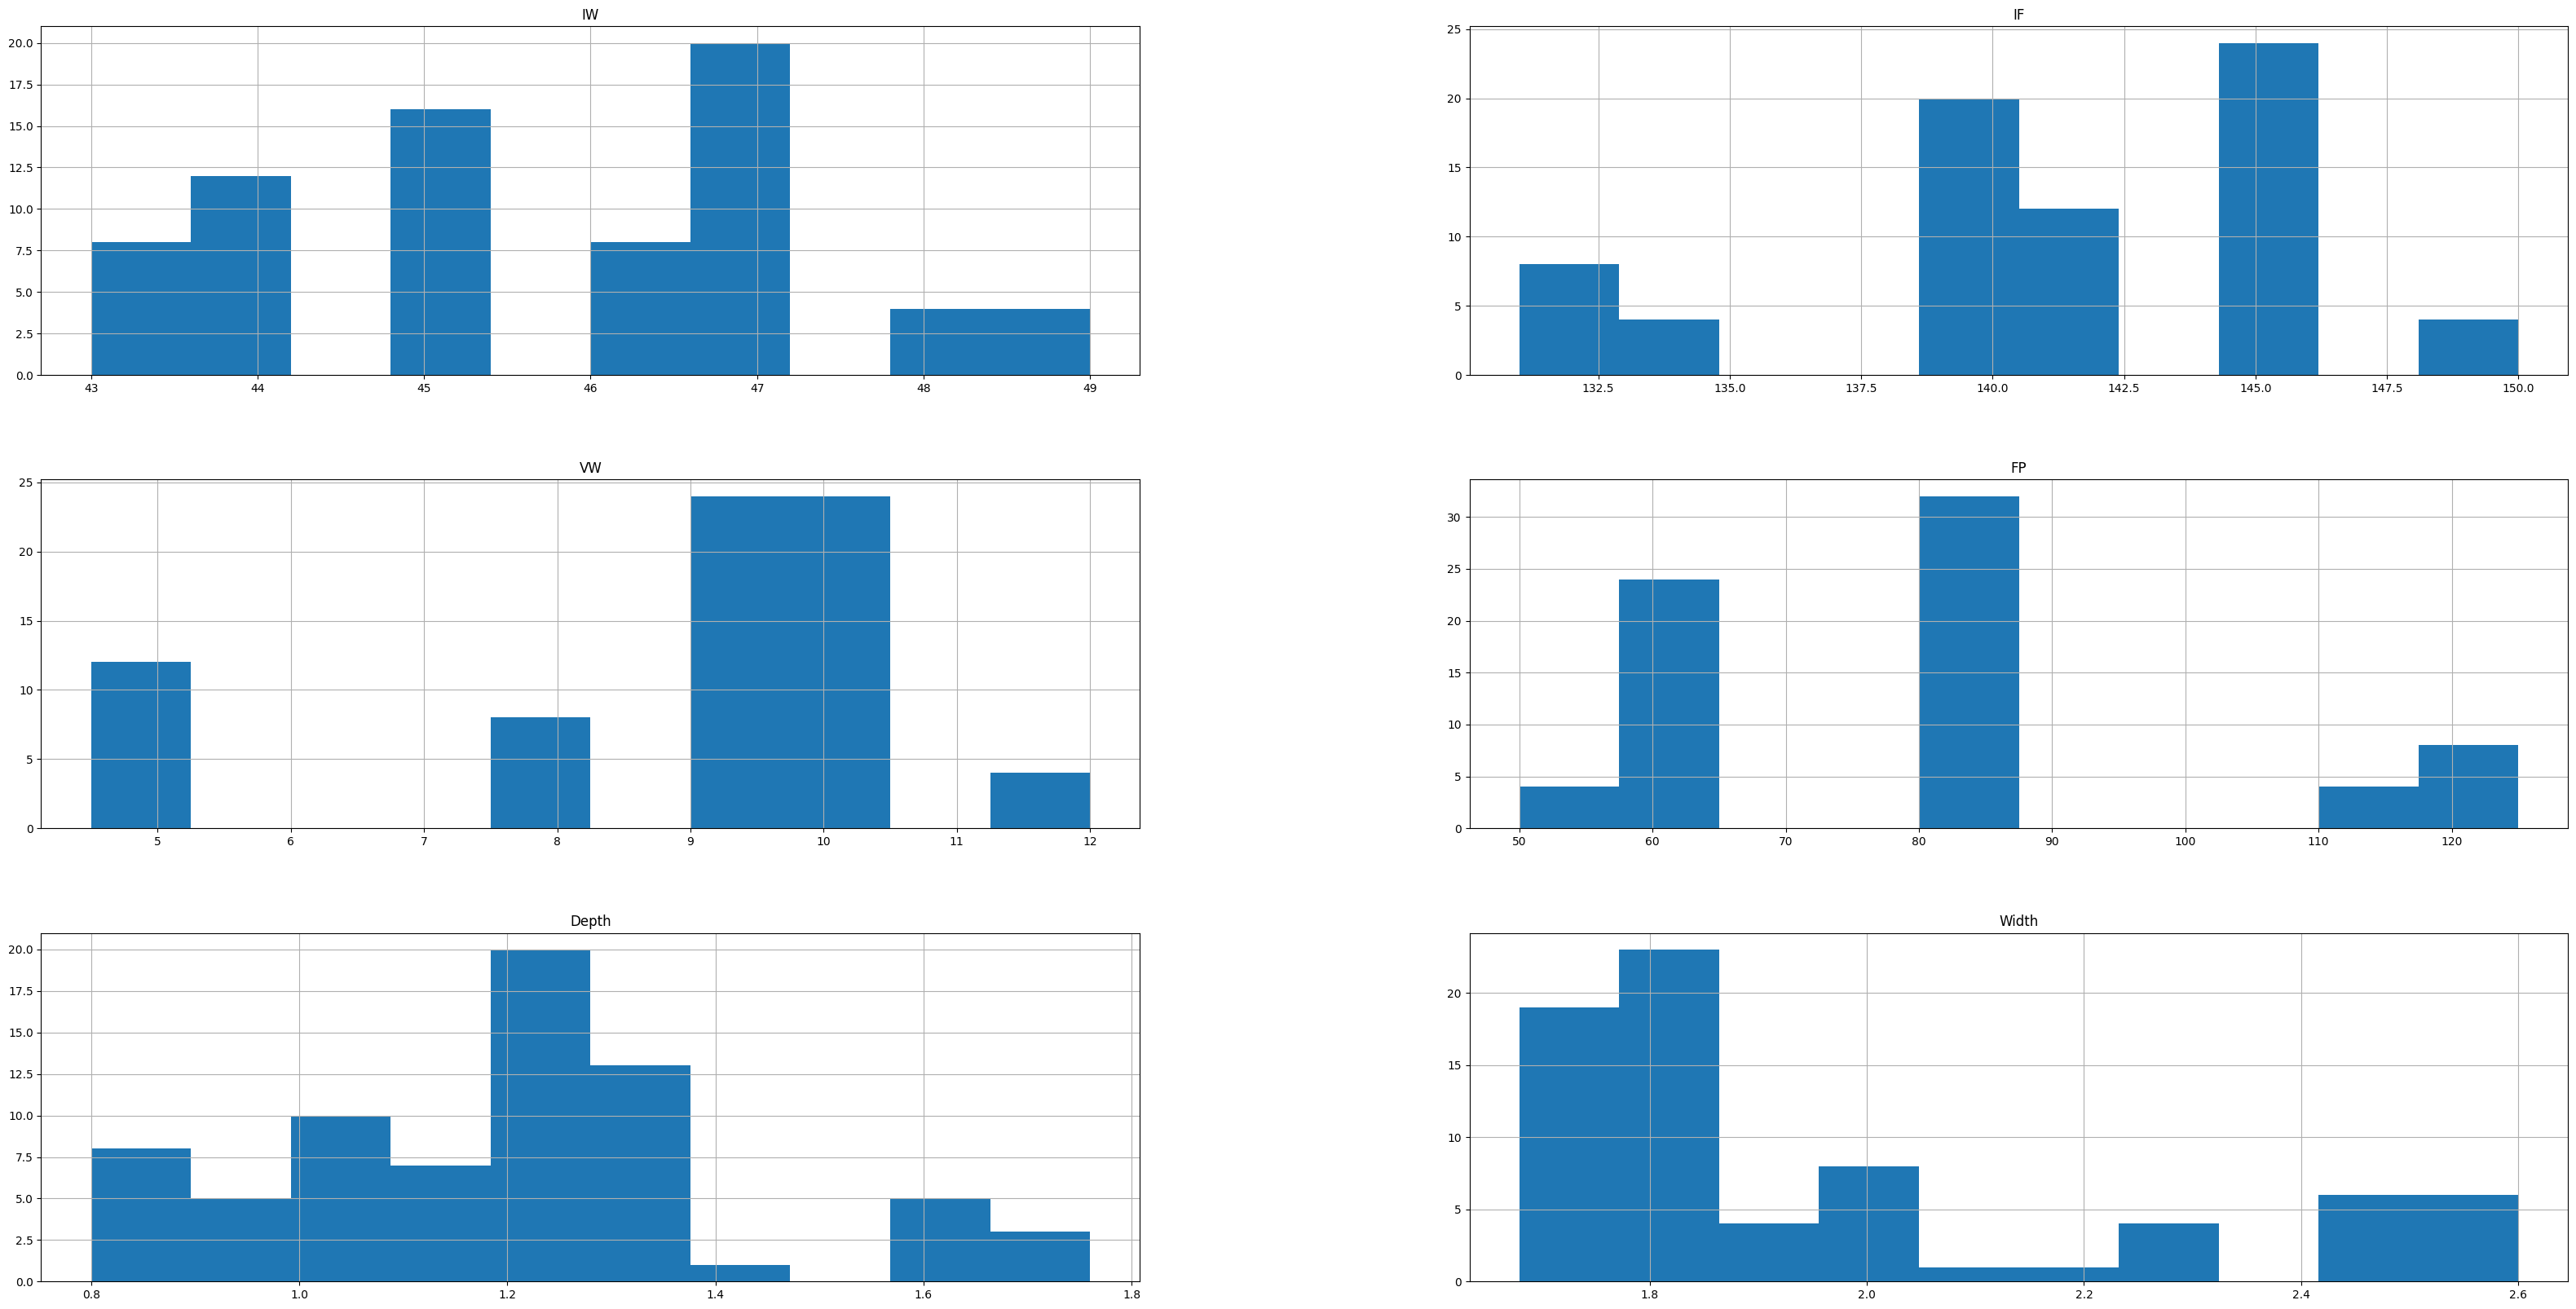

In [ ]:
df.hist(figsize=(40, 20))

In [ ]:
df.nunique()

,0
IW,7
IF,8
VW,5
FP,5
Depth,29
Width,25


In [ ]:
# Посмотрим распределение признаков

df['IW'].value_counts()

,count
IW,
47,20
45,16
44,12
46,8
43,8
49,4
48,4


In [ ]:
df['IF'].value_counts()

,count
IF,
146,24
140,12
141,12
139,8
134,4
131,4
132,4
150,4


In [ ]:
df['VW'].value_counts()

,count
VW,
10.0,24
9.0,24
4.5,12
8.0,8
12.0,4


In [ ]:
df['FP'].value_counts()

,count
FP,
80,32
60,24
125,8
110,4
50,4


In [ ]:
# Посмотрим распределение целевых признаков

df['Depth'].value_counts()

,count
Depth,
1.20,14
1.36,6
1.08,6
1.24,5
1.28,4
1.12,3
0.84,3
0.80,3
1.32,3


In [ ]:
df['Width'].value_counts()

,count
Width,
1.76,12
1.80,8
2.48,5
1.96,4
1.84,4
1.86,4
1.72,4
1.82,4
2.00,3


<Axes: title={'center': 'Матрица корреляций'}>

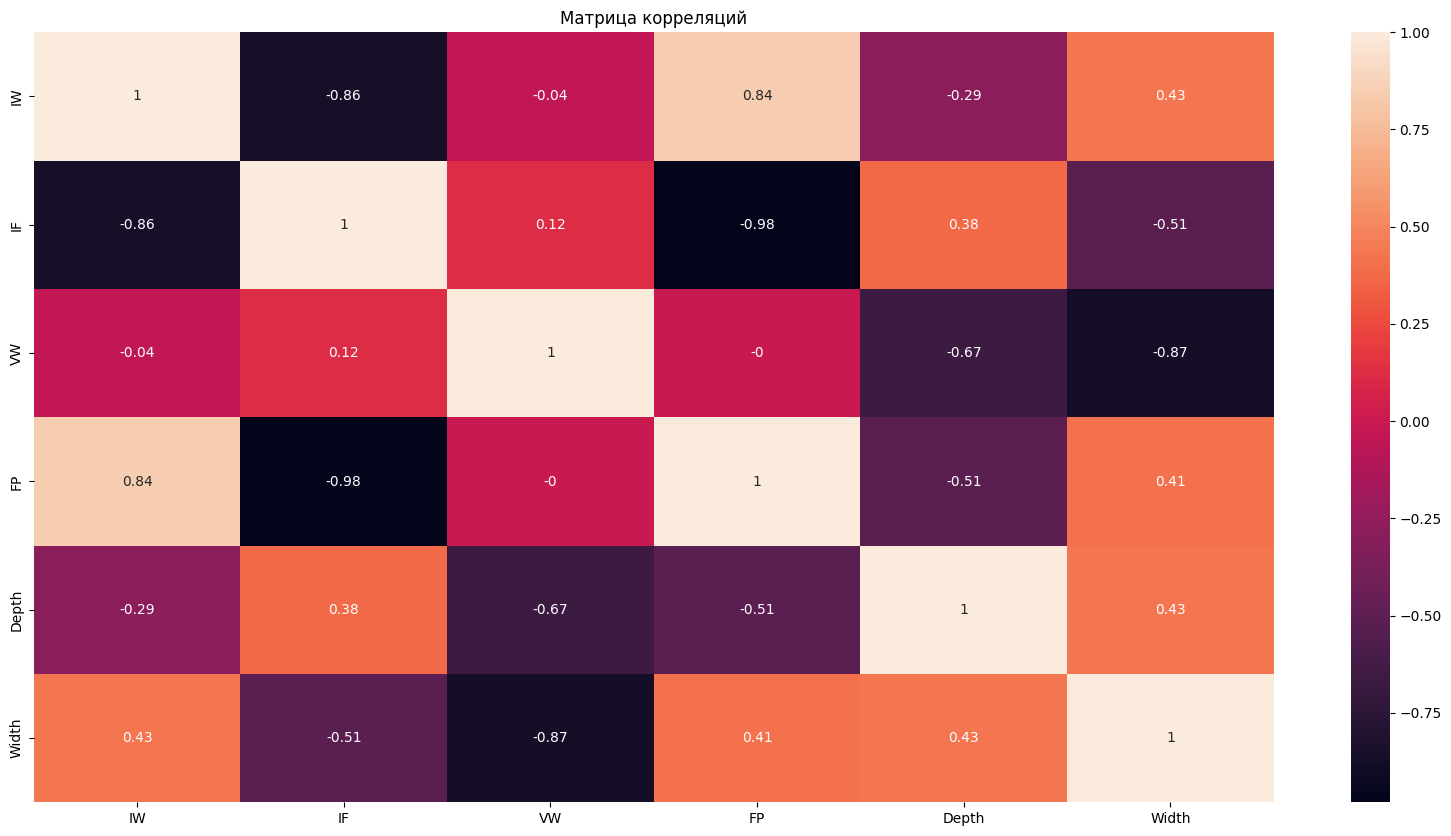

In [ ]:
# Построим график корреляций

plt.figure(figsize = (20, 10))
plt.title('Матрица корреляций')
sns.heatmap(df.corr().round(2), annot = True)


**Выводы:**

- Пропуски отсутствуют

- Категориальных признаков нет

- Все признаки хорошо коррелируют между собой

- Все признаки достаточно равномерно распределены


## **2 Предобработка данных:**

- Удалять нам ничего не надо, да и слишком мало данных, чтобы что-то удалять

- Есть подозрение, что и нормализация/стандартизация не нужны, но, попробуем ради чистоты эксперимента.

In [ ]:
# Создадим пару копий датасета
df_norm = df.copy()
df_stand = df.copy()

In [ ]:
# Нормализация
minmaxscaler = MinMaxScaler()
minmaxscaler.fit(df_norm)
df_norm = pd.DataFrame(minmaxscaler.transform(df_norm), columns = df_norm.columns)
df_norm.head()

,IW,IF,VW,FP,Depth,Width
0,0.666667,0.421053,0.0,0.4,0.833333,0.934783
1,0.666667,0.421053,0.0,0.4,0.854167,0.891304
2,0.666667,0.421053,0.0,0.4,0.916667,1.000000
3,0.666667,0.421053,0.0,0.4,0.812500,0.913043
4,0.333333,0.473684,0.0,0.4,1.000000,0.869565


In [ ]:
# Стандартизация
standardscaler = StandardScaler()
standardscaler.fit(df_stand)
df_stand = pd.DataFrame(standardscaler.transform(df_stand), columns = df_stand.columns)
df_stand.head()

,IW,IF,VW,FP,Depth,Width
0,0.8,-0.456630,-2.02221,0.078087,1.809490,2.055551
1,0.8,-0.456630,-2.02221,0.078087,1.898971,1.911196
2,0.8,-0.456630,-2.02221,0.078087,2.167411,2.272083
3,0.8,-0.456630,-2.02221,0.078087,1.720010,1.983373
4,-0.4,-0.260931,-2.02221,0.078087,2.525333,1.839019


## **3 Построение модели:**
- В нашем случае, с таким количеством данных, использование нейронных сетей - это стрелять не то, что из пушки, а из межгалактического транклюкатора и не по воробьям, а по блохам. Поэтому нейронные сети пробовать не будем, ограничимся моделями машинного обучения и ансаблевыми методами.

In [ ]:
# Сюда будем записывать результаты
Models = pd.DataFrame(columns = ['Algorithm', 'MSE', 'MAE', 'R2'])

def training(Parameters, # Гиперпараметры, которые будет перебирать RandomizedSearchCV
             Model, # Алгоритм ML
             Dataframe, # Наши данные
             Modelname, # Наименования алгоритма для записи в результаты
             Targetname # Наименование целевого признака
             ):

    # Разделим данные на 4 части
    data = Dataframe.copy()

    X = data.drop(Targetname, axis = 1)
    y = data[Targetname]

    # Разделение датасета 80% - 20%
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

    # Подбор лучших гиперпараметров модели с помощью GridSearchCV()
    gscv_model = GridSearchCV(Model, Parameters, n_jobs = -1, cv = 10)
    fitting_model = gscv_model.fit(X_train, y_train)
    best_model = fitting_model.best_estimator_

    # Оценка на оставшихся 20% тестовых данных
    best_model.fit(X_train, y_train)
    prediction = best_model.predict(X_test)

    mse = round(mean_squared_error(y_test, prediction), 2)
    mae = round(mean_absolute_error(y_test, prediction), 2)
    r2 = round(r2_score(y_test, prediction), 2)

    print("=================================================")
    print(Modelname)
    print(fitting_model.best_params_)
    print("MSE = ", mse)
    print("MAE = ", mae)
    print("R2 = ", r2)
    print("=================================================")

    # Возвращаем модель и отчет по метрикам
    model_report = {}
    model_report['Algorithm'] = Modelname
    model_report['MSE'] = mse
    model_report['MAE'] = mae
    model_report['R2'] = r2

    return best_model, model_report

In [ ]:
targetname = ['Depth', 'Width']

### **К-ближайших соседей**

In [ ]:
# К-ближайших соседей
hyperparameters = {
    'n_neighbors': range(1, 50, 2),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
kneighbors_model, kneighbors_model_report = training(hyperparameters, KNeighborsRegressor(), df, "KNeighbors", targetname)
Models = Models._append(kneighbors_model_report, ignore_index = True)

# К-ближайших соседей по нормализованным данным
kneighbors_norm_model, kneighbors_norm_model_report = training(hyperparameters, KNeighborsRegressor(), df_norm, "KNeighbors Normalised", targetname)
Models = Models._append(kneighbors_norm_model_report, ignore_index = True)

# К-ближайших соседей по стандартизованным данным
#kneighbors_stand_model, kneighbors_stand_model_report = training(hyperparameters, KNeighborsRegressor(), df_stand, "KNeighbors Standardised", targetname)
#Models = Models._append(kneighbors_stand_model_report, ignore_index = True)

KNeighbors
{'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}
MSE =  0.0
MAE =  0.05
R2 =  0.94


<ipython-input-21-582b383eb12a>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  Models = Models._append(kneighbors_model_report, ignore_index = True)


KNeighbors Normalised
{'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}
MSE =  0.0
MAE =  0.05
R2 =  0.94


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


### **Деревья решений**

In [ ]:
# Деревья решений
hyperparameters = {
    'criterion': ['absolute_error', 'squared_error', 'friedman_mse', 'poisson'],
    'max_depth' : [4, 6, 8, 10]
}
decision_tree_model, decision_tree_model_report = training(hyperparameters, DecisionTreeRegressor(), df, "DecisionTree", targetname)
Models = Models._append(decision_tree_model_report, ignore_index = True)

# Деревья решений по нормализованным данным
decision_tree_norm_model, decision_tree_norm_model_report = training(hyperparameters, DecisionTreeRegressor(), df_norm, "DecisionTree Normalised", targetname)
Models = Models._append(decision_tree_norm_model_report, ignore_index = True)

# Деревья решений по стандартизованным данным
#decision_tree_stand_model, decision_tree_stand_model_report = training(hyperparameters, DecisionTreeRegressor(), df_stand, "DecisionTree Standardised", targetname)
#Models = Models._append(decision_tree_stand_model_report, ignore_index = True)


DecisionTree
{'criterion': 'squared_error', 'max_depth': 6}
MSE =  0.0
MAE =  0.05
R2 =  0.93
DecisionTree Normalised
{'criterion': 'poisson', 'max_depth': 6}
MSE =  0.0
MAE =  0.05
R2 =  0.93


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


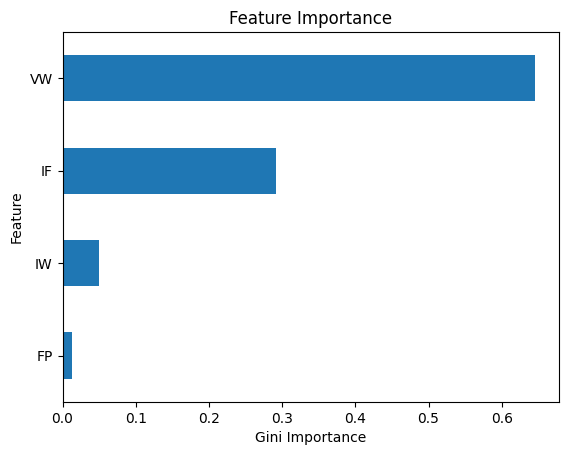

In [ ]:
# Посмотрим какие признаки оказывают наибольшее влияние на результат
features = df.drop(targetname, axis = 1).columns
importances = decision_tree_model.feature_importances_

feat_imp = pd.Series(importances , index = features).sort_values()
feat_imp.tail().plot(kind = 'barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

### **Случайный лес**

In [ ]:
# Случайный лес
hyperparameters = {
    'n_estimators': range(25, 100, 25),
    'criterion': ['squared_error', 'absolute_error', 'poisson'],
    'max_depth': range(1, 7),
    'min_samples_split': range(20, 50, 5),
    'min_samples_leaf': range(2, 8),
    'bootstrap': [True, False]
}
random_forest_model, random_forest_model_report = training(hyperparameters, RandomForestRegressor(), df, "RandomForest", targetname)
Models = Models._append(random_forest_model_report, ignore_index = True)

# Случайный лес по нормализованным данным
random_forest_norm_model, random_forest_norm_model_report = training(hyperparameters, RandomForestRegressor(), df_norm, "RandomForest Normalised", targetname)
Models = Models._append(random_forest_norm_model_report, ignore_index = True)

# Случайный лес по стандартизованным данным
#random_forest_stand_model, random_forest_stand_model_report = training(hyperparameters, RandomForestRegressor(), df_stand, "RandomForest Standardised", targetname)
#Models = Models._append(random_forest_stand_model_report, ignore_index = True)



/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomForest
{'bootstrap': True, 'criterion': 'squared_error', 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 25, 'n_estimators': 25}
MSE =  0.01
MAE =  0.07
R2 =  0.85
RandomForest Normalised
{'bootstrap': True, 'criterion': 'squared_error', 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 20, 'n_estimators': 25}
MSE =  0.01
MAE =  0.07
R2 =  0.86


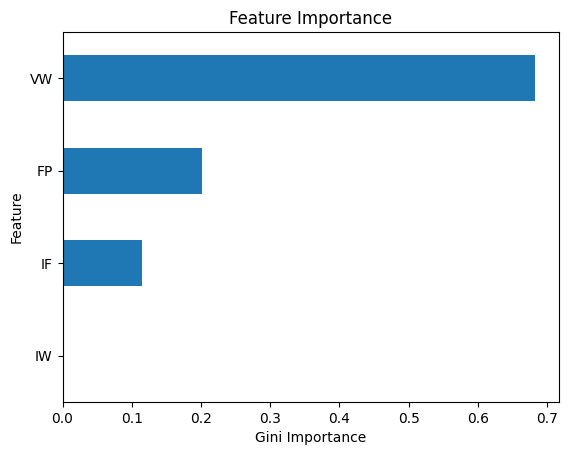

In [ ]:
# Посмотрим какие признаки оказывают наибольшее влияние на результат
importances = random_forest_model.feature_importances_

feat_imp = pd.Series(importances , index = features).sort_values()
feat_imp.tail().plot(kind = 'barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

### **Сравнение моделей**

In [ ]:
Models.sort_values('R2', ascending = False).head(100)


,Algorithm,MSE,MAE,R2
0,KNeighbors,0.00,0.05,0.94
1,KNeighbors Normalised,0.00,0.05,0.94
2,DecisionTree,0.00,0.05,0.93
3,DecisionTree Normalised,0.00,0.05,0.93
5,RandomForest Normalised,0.01,0.07,0.86
4,RandomForest,0.01,0.07,0.85


### **Выводы**

- Как и предполагалось выше, нормализация не дала эффекта. Стандартизация тоже результат не улучшила, но еще вызвала конфликты с некоторыми гиперпараметрами, поэтому была исключена.

- Наилучшим образом себя показала модель Ближайших соседей

## **4 Сохранение моделей**

In [ ]:
pickle.dump(kneighbors_model, open('/content/drive/MyDrive/Colab Notebooks/Exam_2/kneighbors_model.pkl', 'wb'))
pickle.dump(decision_tree_model, open('/content/drive/MyDrive/Colab Notebooks/Exam_2/decision_tree_model.pkl', 'wb'))
pickle.dump(random_forest_model, open('/content/drive/MyDrive/Colab Notebooks/Exam_2/random_forest_model.pkl', 'wb'))


In [3]:
kneighbors_model = pickle.load(open(r'/content/drive/MyDrive/Colab Notebooks/Exam_2/kneighbors_model.pkl', 'rb'))



In [14]:
prediction = kneighbors_model.predict([[10, 10, 10, 10]])
print(prediction)
print(prediction[0][0])
print(prediction[0][1])


[[1.22666667 1.78      ]]
1.2266666666666666
1.78


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
